# Apply spaTrack to infer cell trajectory in scRNA-seq data from  hematopoietic stem cells development with multiple directions

Besides spatial transcriptomics data, spaTrack can also apply trajectory inference to scRNA-seq data by considering only UMAP coordinates.This notebook demonstrates how spaTrack performs trajectory inference on scRNA-seq data using human hematopoiesis cells (HSPC) as an example. The example data can be donwloaded from [example data](http://116.6.21.110:8090/share/c5d9e7f3-7d66-4154-87e1-a740f4bb4dbc).

In [1]:
import warnings
warnings.filterwarnings("ignore")

import stereo as st

## Loading data and preprocessing

In [2]:
data_path = '../../data/05.HSPC.Sc-RNA.data/05.HSPC.Sc-RNA.data.h5ad'

Here we use UMAP coordinates as spatial coordintates.

In [3]:
data = st.io.read_h5ad(data_path, spatial_key='X_umap')

In this data, the cell type information is stored in `data.cells['cluster']` or `data.adata.obs['cluster']`.

In [4]:
cluster_res_key = 'cluster'

basic preprocessing

In [5]:
data.tl.cal_qc()
data.tl.filter_genes(min_cells=30)
data.tl.raw_checkpoint()
data.tl.normalize_total()
data.tl.log1p()

[2024-11-05 16:57:18][Stereo][34972][MainThread][140456885274432][st_pipeline][41][INFO]: start to run cal_qc...
[2024-11-05 16:57:18][Stereo][34972][MainThread][140456885274432][st_pipeline][44][INFO]: cal_qc end, consume time 0.1148s.
[2024-11-05 16:57:18][Stereo][34972][MainThread][140456885274432][st_pipeline][41][INFO]: start to run filter_genes...
[2024-11-05 16:57:18][Stereo][34972][MainThread][140456885274432][st_pipeline][44][INFO]: filter_genes end, consume time 0.1223s.
[2024-11-05 16:57:18][Stereo][34972][MainThread][140456885274432][st_pipeline][41][INFO]: start to run normalize_total...
[2024-11-05 16:57:18][Stereo][34972][MainThread][140456885274432][st_pipeline][44][INFO]: normalize_total end, consume time 0.0395s.
[2024-11-05 16:57:18][Stereo][34972][MainThread][140456885274432][st_pipeline][41][INFO]: start to run log1p...
[2024-11-05 16:57:19][Stereo][34972][MainThread][140456885274432][st_pipeline][44][INFO]: log1p end, consume time 0.0895s.


Visualization of cell type information

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

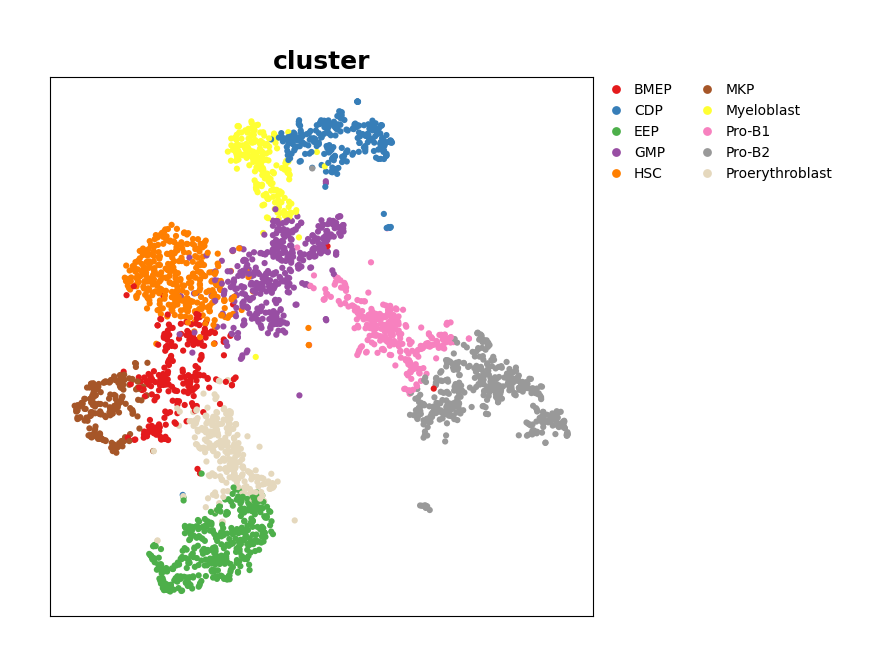

In [6]:
data.plt.cluster_scatter(res_key=cluster_res_key, invert_y=False, marker='o', dot_size=20, show_plotting_scale=False)

## Get An object of spaTrack

Set the cell type information to be used through parameter `cluster_res_key`.

In [7]:
spt = data.tl.spa_track(cluster_res_key=cluster_res_key)

2024-11-05 16:57:21.046103: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[2024-11-05 16:57:23][Stereo][34972][MainThread][140456885274432][st_pipeline][77][INFO]: register algorithm spa_track to <stereo.core.st_pipeline.AnnBasedStPipeline object at 0x7fbea42aa520>


## Choose start cells

Based on prior biological knowledge, HSC(hematopoietic stem cells) have the ability to self-renew and differentiate into various blood cell types, making them essential for the production and replenishment of blood cells in the body. We set HSC as the starting cluster in this data.

In [8]:
spt.set_start_cells(select_way='cell_type', cell_type='HSC')

array([   2,   25,   28,   66,   68,   85,  103,  106,  149,  153,  155,
        160,  167,  170,  173,  195,  205,  220,  222,  224,  228,  239,
        249,  270,  278,  281,  286,  292,  295,  296,  304,  307,  325,
        336,  340,  353,  377,  388,  394,  426,  428,  432,  438,  449,
        451,  482,  488,  512,  523,  533,  536,  552,  557,  559,  567,
        574,  577,  581,  593,  628,  635,  637,  641,  648,  653,  685,
        691,  727,  729,  738,  740,  746,  757,  772,  778,  779,  783,
        795,  804,  814,  826,  827,  831,  836,  844,  851,  854,  862,
        866,  868,  895,  896,  902,  905,  910,  918,  924,  930,  945,
        953,  966,  995, 1001, 1009, 1016, 1017, 1025, 1056, 1057, 1062,
       1076, 1087, 1089, 1091, 1098, 1101, 1107, 1128, 1132, 1138, 1147,
       1150, 1156, 1160, 1181, 1195, 1202, 1210, 1220, 1234, 1239, 1240,
       1244, 1254, 1268, 1280, 1283, 1288, 1292, 1297, 1301, 1315, 1316,
       1319, 1322, 1323, 1324, 1326, 1331, 1337, 13

Visualization of the start cells.

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

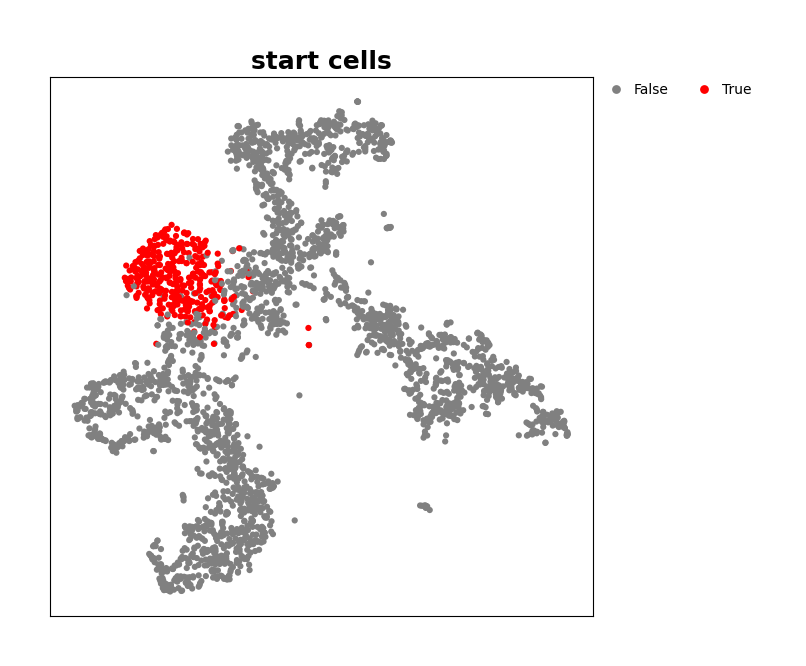

In [9]:
data.plt.cluster_scatter(
    res_key='start_cells',
    marker='o',
    dot_size=20,
    title='start cells',
    invert_y=False, 
    show_plotting_scale=False,
    palette=['gray', 'red'])

## Calculate cell transition probability

Calculate cell transition probability matrix between cells.

In [10]:
spt.get_ot_matrix(data_type="single-cell")

[2024-11-05 16:57:23][Stereo][34972][MainThread][140456885274432][velocity][88][INFO]: Can not find PCA result, to calculate automatically using highly variable genes.
[2024-11-05 16:57:23][Stereo][34972][MainThread][140456885274432][velocity][89][INFO]: n_pcs: 50
[2024-11-05 16:57:23][Stereo][34972][MainThread][140456885274432][st_pipeline][41][INFO]: start to run pca...
[2024-11-05 16:58:00][Stereo][34972][MainThread][140456885274432][dim_reduce][99][INFO]: x_pca dType is changed from float64 to float32
[2024-11-05 16:58:00][Stereo][34972][MainThread][140456885274432][st_pipeline][44][INFO]: pca end, consume time 37.1620s.
[2024-11-05 16:58:00][Stereo][34972][MainThread][140456885274432][velocity][124][INFO]: alpha1(gene expression): 0.5   alpha2(spatial information): 0.5


array([[0.00000000e+00, 1.58748285e-07, 3.10250739e-08, ...,
        7.77509183e-08, 1.33482291e-07, 7.04983659e-08],
       [1.58748285e-07, 0.00000000e+00, 8.27331922e-08, ...,
        1.31278972e-07, 1.74394420e-07, 1.47537194e-07],
       [3.10250739e-08, 8.27331922e-08, 0.00000000e+00, ...,
        8.24986908e-08, 5.27277723e-08, 1.34760071e-07],
       ...,
       [7.77509183e-08, 1.31278972e-07, 8.24986909e-08, ...,
        0.00000000e+00, 2.16758201e-07, 2.24293099e-07],
       [1.33482291e-07, 1.74394420e-07, 5.27277723e-08, ...,
        2.16758201e-07, 0.00000000e+00, 1.44527786e-07],
       [7.04983659e-08, 1.47537194e-07, 1.34760071e-07, ...,
        2.24293099e-07, 1.44527786e-07, 0.00000000e+00]])

## Caculate cell pseudotime

Infer the cell pseudotime based on the OT matrix and start cells. 

In [11]:
spt.get_ptime()

array([0.87136243, 0.54497354, 0.06448413, ..., 0.54398148, 0.74404762,
       0.35912698])

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

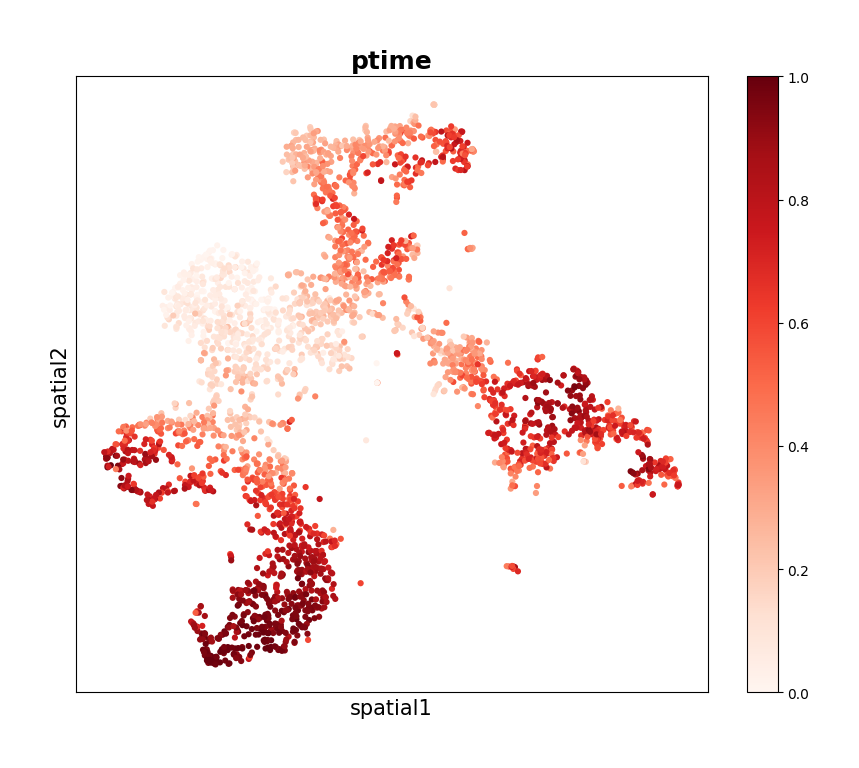

In [12]:
data.plt.spatial_scatter(cells_key='ptime', marker='o', dot_size=20, palette='Reds', invert_y=False, show_plotting_scale=False)

## Calculate vector field velocity.

In [13]:
spt.get_velocity(n_neigh_pos=100, n_neigh_gene=0)

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

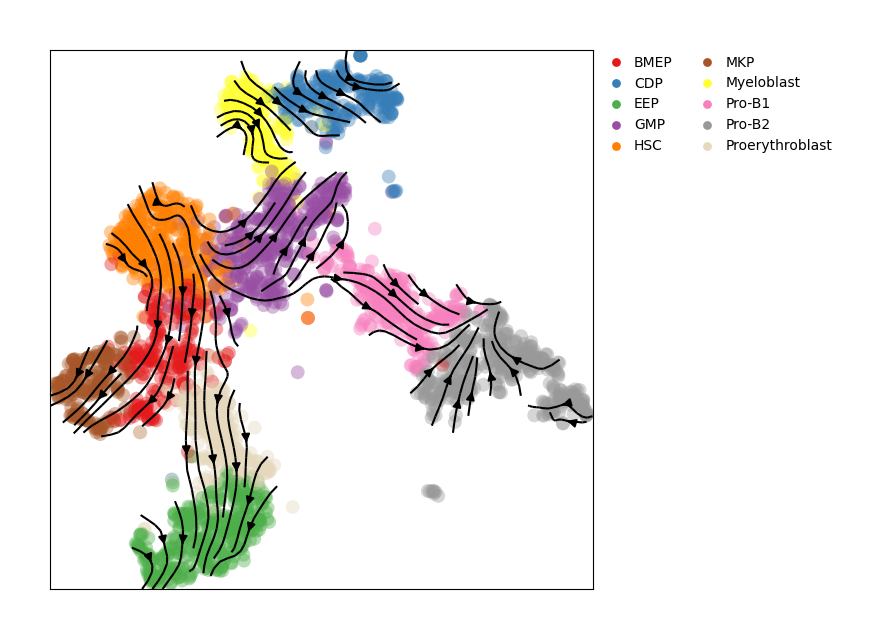

In [14]:
spt.plot.stremplot(dot_size=100, invert_y=False, stream_lines_width=1.5, stream_lines_density=1.8, stream_arrows_size=1.2)

## Downstream analysis

### Least Action Path (LAP)

In [15]:
spt.create_vector_field()

Select the start point and the end point of the least action path.

In [16]:
LAP_start_point=[-20,10]
LAP_end_point=[-30,-10]

spt.set_lap_endpoints(
    LAP_start_point, LAP_end_point
)

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

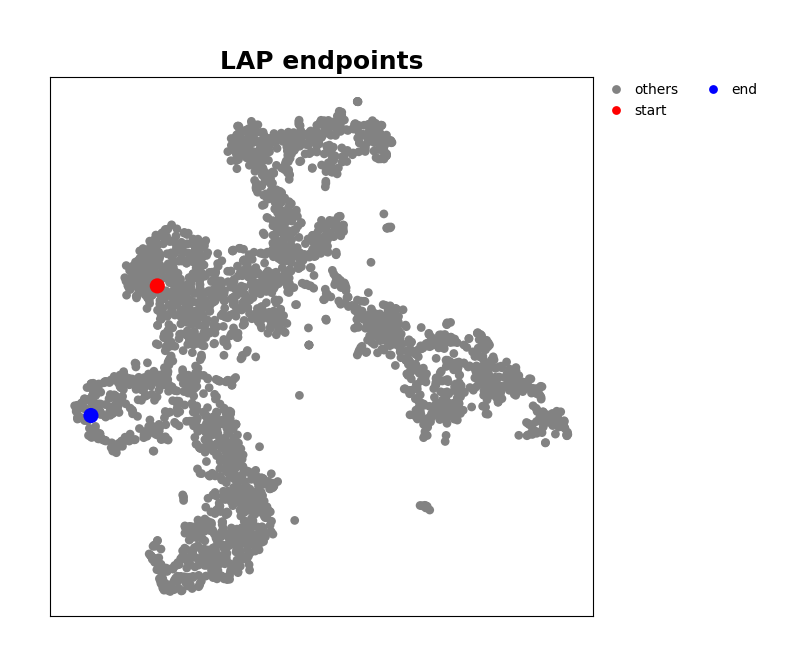

In [17]:
spt.plot.lap_endpoints(invert_y=False)

Calculate the least action path between the given starting cells and end cells. 

In [18]:
lap_st = spt.least_action(
    n_points = 20,
    EM_steps = 10
)

[2024-11-05 16:58:26][Stereo][34972][MainThread][140456885274432][st_pipeline][41][INFO]: start to run neighbors...
[2024-11-05 16:58:31][Stereo][34972][MainThread][140456885274432][st_pipeline][44][INFO]: neighbors end, consume time 5.1257s.


Plot the least action Path.

In [19]:
spt.map_cell_to_LAP()

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

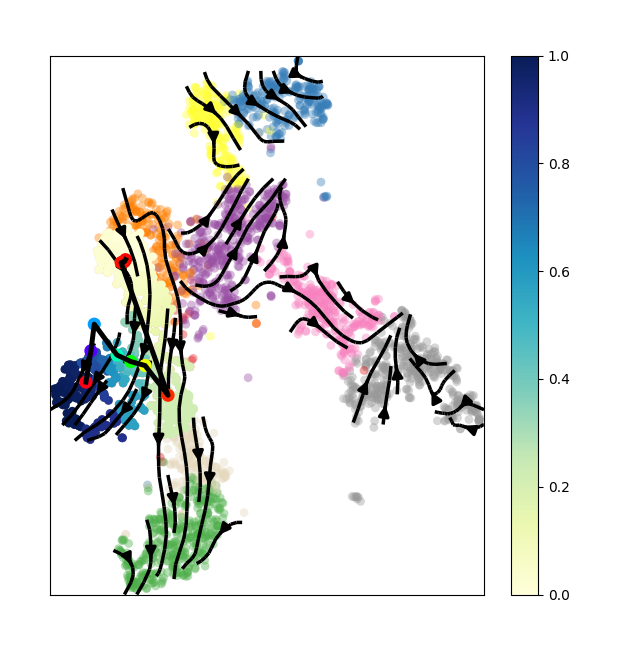

In [20]:
spt.plot.least_action_path(invert_y=False,stream_lines_density=1.2, stream_lines_width=2.5, stream_arrows_size=1.5)

### Pseudotime-dependent genes on LAP

Select the targeted cell type for least action path (LAP) analysis and filter out genes with highly variable and expression below the minimum proportion.

In [21]:
sub_adata_path_st = spt.filter_genes(
    min_exp_prop_in_genes=0.1, n_hvg=5000, focused_cell_types=['HSC','BMEP','MKP']
)

[2024-11-05 16:58:35][Stereo][34972][MainThread][140456885274432][st_pipeline][41][INFO]: start to run highly_variable_genes...
[2024-11-05 16:58:35][Stereo][34972][MainThread][140456885274432][st_pipeline][44][INFO]: highly_variable_genes end, consume time 0.2154s.
[2024-11-05 16:58:35][Stereo][34972][MainThread][140456885274432][Pgene][121][INFO]: Cell number	602
[2024-11-05 16:58:35][Stereo][34972][MainThread][140456885274432][Pgene][122][INFO]: Gene number	2288


Next, we use a Generalized Additive Model to fit the gene expression and corresponding cell pseudotime. Pseudotime-dependent genes are then filtered based on the degree of model fit and the false discovery rate (FDR). To visualize pseudotime-dependent genes across the trajectory, we partition the cells ordered by pseudotime into windows and rank genes based on their maximum expression within each window.

In [22]:
df_res_st = spt.ptime_gene_GAM(sub_adata_path_st)

[2024-11-05 16:58:35][Stereo][34972][MainThread][140456885274432][Pgene][208][INFO]: Genes number fitted by GAM model:  2288


Order genes and plot the heatmap.

In [23]:
sort_exp_sig_st = spt.order_trajectory_genes(df_res_st, min_model_fit=0.4, max_fdr=0.05, cell_number=20)

[2024-11-05 16:59:31][Stereo][34972][MainThread][140456885274432][Pgene][319][INFO]: Finally selected 86 genes.


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

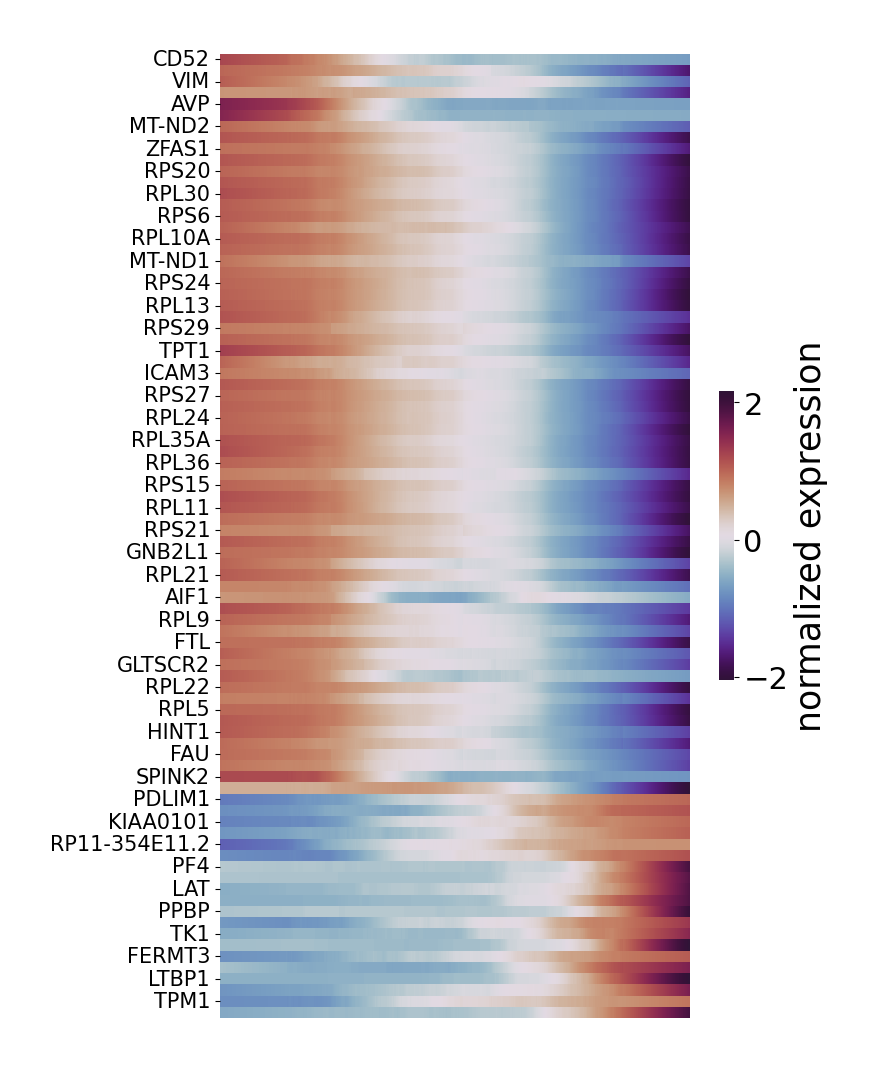

In [24]:
spt.plot.trajectory_gene_heatmap(sort_exp_sig_st, smooth_length=200, gene_label_size=15)

Show the relationship between genes and ptime.

[2024-11-05 16:59:32][Stereo][34972][MainThread][140456885274432][st_pipeline][41][INFO]: start to run highly_variable_genes...
[2024-11-05 16:59:32][Stereo][34972][MainThread][140456885274432][st_pipeline][44][INFO]: highly_variable_genes end, consume time 0.1374s.
[2024-11-05 16:59:32][Stereo][34972][MainThread][140456885274432][Pgene][121][INFO]: Cell number	602
[2024-11-05 16:59:32][Stereo][34972][MainThread][140456885274432][Pgene][122][INFO]: Gene number	2288


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

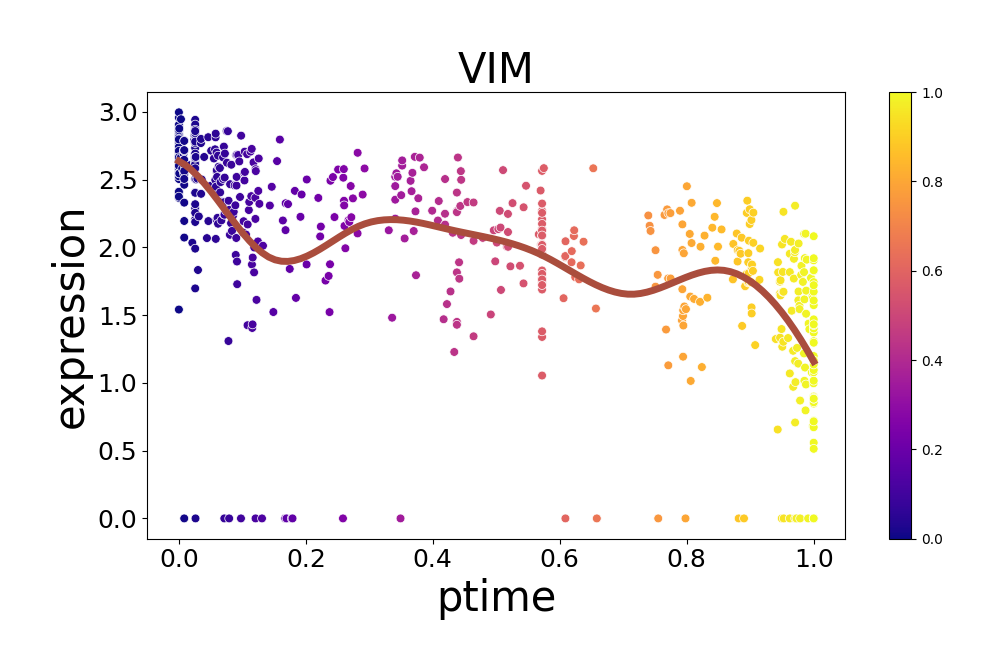

In [25]:
spt.plot.trajectory_gene(gene_name='VIM', dot_size=40, show_cell_type=False)